In [97]:
import pandas as pd
import numpy as np

In [98]:
data_dir = '../data/train_test'
selected_bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12']

## Data preprocessing

### Augmenting rows

In [99]:
def add_column_statistics(df, columns, by_column=None, add_std=False):
    df = df.copy()

    if by_column:
        for i in columns:
            df[f'{i}_min_by_fid'] = df.groupby(by_column)[i].transform('min')
            df[f'{i}_max_by_fid'] = df.groupby(by_column)[i].transform('max')
            df[f'{i}_avg_by_fid'] = df.groupby(by_column)[i].transform('mean')

            if add_std:
                df[f'{i}_std_by_fid'] = df.groupby(by_column)[i].transform('std')
    else:
        for i in columns:
            if add_std:
                df[f'{i}_std'] = df.filter(regex = f'^{i}').std(axis = 1)
                
            df[f'{i}_max'] = df.filter(regex = f'^{i}').max(axis = 1)
            df[f'{i}_min'] = df.filter(regex = f'^{i}').min(axis = 1)
            df[f'{i}_avg'] =df.filter(regex = f'^{i}').mean(axis = 1)

    return df
    

def add_column_mappings(df, columns, add_sqrt=False):
    df = df.copy()

    for i in columns:
        
        if add_sqrt:
            df[f'{i}_sqrt'] = np.sqrt(df[i].values)
            
        df[f'{i}_exp'] = np.exp(df[i].values)
        df[f'{i}_^2'] = df[i].values**2
    
    return df

### Add spetral indices

In [100]:
spectral_indices = [
    "NDVI",
    "GNDVI",
    # "EVI",
    "EVI2",
    # "AdvVI", # Advanced vegitation index
    "BSI",
    "SI",
    "NDWI",
    "NDMI",
    "NPCRI",
    "SAVI",
    "MSI",
    "GCI",
    "NBRI",
    "NDSI",
    "NDGI",
    "ARVI",
    "SIPI",
    
    # other from paper  https://www.spiedigitallibrary.org/journals/journal-of-applied-remote-sensing/volume-12/issue-02/026019/Crop-classification-from-Sentinel-2-derived-vegetation-indices-using-ensemble/10.1117/1.JRS.12.026019.full 
    # "AFRI1.6",
    # "AFRI2.1",
    #"ARI",
    # "ARVI_paper",
    # "ARVI2", # depends on a hyperparameter
    # "ATSAVI" # depends on a hyperparameter
    # "AshVI", # Ashburn vegetation index
    # "BNDVI",
    # "BRI",
    
    # "BWDRVI",
    # "MCARI1",
    # "MCARI2",
    # "CCCI",
    # "CRI550",
    # "CRI700",
    # "CVI",
    # "Datt1",
    # "Datt2",
    # "Datt3",
    # "DVI",
    # "NDI45"
]

def add_spectral_indices(df, phi=1, a=1.22, b=0.03, X=0.08):
    df = df.copy()
    
    df["NDVI"] = (df["B08"] - df["B04"]) / (df["B08"] + df["B04"])
    df["GNDVI"] = (df["B08"] - df["B03"]) / (df["B08"] + df["B03"])
    # df["EVI"] = 2.5 * ((df["B08"] - df["B04"]) / ((df["B08"] + 6.0 * df["B04"] - 7.5 * df['B02']) + 1.0))
    df["EVI2"] = 2.4 * (df["B08"] - df["B04"]) / (df["B08"] + df["B04"] + 1.0)
    # df["AdvVI"] = (df["B08"] * (1 - df["B04"]) * (df["B08"] - df["B04"]))**(1/3)
    df["BSI"] = ((df["B11"] + df["B04"]) - (df["B08"] + df["B02"])) / ((df["B11"] + df["B04"]) + (df["B08"] + df["B02"]))
    df["SI"] = ((1 - df["B02"]) * (1 - df["B03"]) * (1 - df["B04"]))
    df["NDWI"] = (df["B03"] - df["B08"]) / (df["B03"] + df["B08"])
    df["NDMI"] = (df["B08"] - df["B11"]) / (df["B08"] + df["B11"]) 
    df["NPCRI"] = (df["B04"] - df["B02"]) / (df["B04"] + df["B02"]) 
    df["SAVI"] = (df["B08"] - df["B04"]) / (df["B08"] + df["B04"] + 0.428) * (1.428)
    df["MSI"] = df["B11"] / df["B08"]
    df["GCI"] = (df["B09"] / df["B03"]) - 1
    df["NBRI"] = (df["B08"] - df["B12"]) / (df["B08"] + df["B12"])
    df["NDSI"] = (df["B03"] - df["B11"]) / (df["B03"] + df["B11"])
    df["NDGI"] = (df["B03"] - df["B04"]) / (df["B03"] + df["B04"]) 
    df["ARVI"] = (df["B08"] - (2 * df["B04"]) + df["B02"]) / (df["B08"] + (2 * df["B04"]) + df["B02"]) 
    df["SIPI"] = (df["B08"] - df["B02"]) / (df["B08"] - df["B04"])
    
    # other from paper  https://www.spiedigitallibrary.org/journals/journal-of-applied-remote-sensing/volume-12/issue-02/026019/Crop-classification-from-Sentinel-2-derived-vegetation-indices-using-ensemble/10.1117/1.JRS.12.026019.full 
    # df["AFRI1.6"] = (df["B8A"] - 0.66*df["B11"]) / (df["B8A"] + 0.66*df["B11"])
    # df["AFRI2.1"] = (df["B8A"] - 0.5*df["B12"]) / (df["B8A"] + 0.5*df["B12"])
    # df["ARI"] = ((1/df["B03"]) - (1/df["B05"]))
    # df["ARVI_paper"] = (df["B08"] - (df["B04"] - phi*(df["B02"] - df["B04"]))) / (df["B08"] + (df["B04"] - phi*(df["B02"] - df["B04"])))
    # df["ARVI2"] = -0.18 + 1.17 + ((df["B08"] - df["B04"]) / (df["B08"] + df["B04"]))
    # df["ATSAVI"] = a*(df["B08"] - a*df["B04"] - b) / (df["B08"] + df["B04"] - a*b + X*(1 + a**2))
    # df["AshVI"] = 2*df["B8A"] - df["B04"]
    # df["BNDVI"] = (df["B08"] - df["B02"]) / (df["B08"] + df["B02"])
    # df["BRI"] = ((1 / df["B03"]) - (1 / df["B05"])) / df["B06"]
    
    # df["BWDRVI"] = (0.1*df["B07"] - df["B02"])/(0.1*df["B07"] + df["B02"])
    
    # Chlorophyll absorption ratio index
    # df["MCARI"] = ((df["B05"] - df["B04"]) - 0.2*(df["B05"] - df["B03"])) * (df["B05"]/df["B04"])
    # df["MCARI1"] = 1.2 * (2.5 * df["B08"] - df["B04"]) - 1.3*(df["B08"] - df["B03"])
    # df["MCARI2"] = 1.5 * ((2.5 * (df["B08"] - df["B04"]) - 1.3*(df["B08"] - df["B03"])) / ((((2*df["B08"] + 1)**2 - (6*df["B08"] - 5*(df["B04"]**(1/2)))) ** (1/2))) - 0.5)
    
    # df["CCCI"] = ((df["B08"] - df["B05"]) / (df["B08"] + df["B05"])) / ((df["B08"] - df["B04"]) / (df["B08"] + df["B04"]))
    # df["CRI550"] = (1 / df["B02"]) - (1 / df["B03"])
    # df["CRI700"] = (1 / df["B02"]) - (1 / df["B05"])
    # df["CVI"] = (df["B08"] * df["B08"]) / (df["B03"])**2
    # df["Datt1"] = (df["B08"] - df["B05"]) / (df["B08"] + df["B04"])
    # df["Datt2"] = df["B04"] / (df["B03"] * df["B05"])
    # df["Datt3"] = df["B8A"] / (df["B03"] * df["B05"])
    # df["DVI"] = 2.4 * df["B08"] - df["B04"]
    # df["NDI45"] = (df["B05"] - df["B04"]) / (df["B05"] + df["B04"])
    
    return df

In [101]:
df_train = pd.read_csv(f"{data_dir}/preprocessed/tabular_train.csv")
df_test = pd.read_csv(f"{data_dir}/preprocessed/tabular_test.csv")
df_all = pd.concat([df_train, df_test])

display(df_all.head())

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,field_id,crop
0,44,40,40,42,45,59,70,63,76,13,78,55,1374,1.0
1,44,40,40,42,45,59,70,62,76,13,78,55,1374,1.0
2,44,40,39,42,46,52,58,54,62,16,72,53,3293,1.0
3,44,41,39,43,48,58,65,61,71,16,78,61,3293,1.0
4,44,40,40,44,48,58,65,64,71,16,78,61,3293,1.0


In [102]:
# spectral bands
df_all = add_column_statistics(df_all, selected_bands)
# df_all = add_column_mappings(df_all, selected_bands, add_sqrt=True)
df_all = add_column_statistics(df_all, selected_bands, "field_id")

# spectral indices
df_all = add_spectral_indices(df_all)
df_all = add_column_statistics(df_all, spectral_indices)
# df_all = add_column_mappings(df_all, spectral_indices)
df_all = add_column_statistics(df_all, spectral_indices, "field_id")

display(df_all.head())

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,...,NDSI_avg_by_fid,NDGI_min_by_fid,NDGI_max_by_fid,NDGI_avg_by_fid,ARVI_min_by_fid,ARVI_max_by_fid,ARVI_avg_by_fid,SIPI_min_by_fid,SIPI_max_by_fid,SIPI_avg_by_fid
0,44,40,40,42,45,59,70,63,76,13,...,-0.317357,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093
1,44,40,40,42,45,59,70,62,76,13,...,-0.317357,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093
2,44,40,39,42,46,52,58,54,62,16,...,-0.312590,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843
3,44,41,39,43,48,58,65,61,71,16,...,-0.312590,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843
4,44,40,40,44,48,58,65,64,71,16,...,-0.312590,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843


In [103]:
df_all = df_all.join(df_all.groupby("field_id").size().rename(f'num_pixels_by_fid'), on='field_id')

df_all.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,...,NDGI_min_by_fid,NDGI_max_by_fid,NDGI_avg_by_fid,ARVI_min_by_fid,ARVI_max_by_fid,ARVI_avg_by_fid,SIPI_min_by_fid,SIPI_max_by_fid,SIPI_avg_by_fid,num_pixels_by_fid
0,44,40,40,42,45,59,70,63,76,13,...,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093,36
1,44,40,40,42,45,59,70,62,76,13,...,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093,36
2,44,40,39,42,46,52,58,54,62,16,...,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843,19
3,44,41,39,43,48,58,65,61,71,16,...,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843,19
4,44,40,40,44,48,58,65,64,71,16,...,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843,19


In [104]:
tmp = df_all.drop(columns=["crop"])

tmp.loc[:, tmp.isna().any()]

""
0
1
2
3
4
...
49313
49314
49315
49316


## Feature selection

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train = df_all[~df_all["crop"].isnull()]
df_test = df_all[df_all["crop"].isnull()]
y_train = X_train["crop"]

X_train = X_train.drop(columns=["field_id", "crop"])
X_test = df_test.drop(columns=["field_id", "crop"])

In [107]:
X_train.shape, y_train.shape, X_test.shape

((188228, 197), (188228,), (49318, 197))

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 5, shuffle = True)

In [109]:
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_predict
from sklearn.utils.class_weight import compute_class_weight

In [110]:
label_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [111]:
# cb_pi --> catboost_permutation_importance\n",
cb_pi = CatBoostClassifier(n_estimators = 1400, learning_rate = 0.03, random_state = 11, task_type = "GPU")
cb_pi.fit(X_train, y_train)

0:	learn: 2.4183771	total: 39.2ms	remaining: 54.9s
1:	learn: 2.3021377	total: 76ms	remaining: 53.1s
2:	learn: 2.2046248	total: 113ms	remaining: 52.8s
3:	learn: 2.1221664	total: 152ms	remaining: 52.9s
4:	learn: 2.0477782	total: 189ms	remaining: 52.7s
5:	learn: 1.9838064	total: 224ms	remaining: 52s
6:	learn: 1.9247354	total: 258ms	remaining: 51.4s
7:	learn: 1.8716038	total: 293ms	remaining: 51s
8:	learn: 1.8230345	total: 334ms	remaining: 51.7s
9:	learn: 1.7777502	total: 367ms	remaining: 51s
10:	learn: 1.7366751	total: 399ms	remaining: 50.4s
11:	learn: 1.6996308	total: 430ms	remaining: 49.8s
12:	learn: 1.6647190	total: 463ms	remaining: 49.4s
13:	learn: 1.6314573	total: 495ms	remaining: 49s
14:	learn: 1.6014393	total: 526ms	remaining: 48.6s
15:	learn: 1.5729404	total: 559ms	remaining: 48.4s
16:	learn: 1.5464054	total: 588ms	remaining: 47.9s
17:	learn: 1.5220640	total: 621ms	remaining: 47.7s
18:	learn: 1.4972516	total: 655ms	remaining: 47.6s
19:	learn: 1.4750760	total: 685ms	remaining: 47.3

In [112]:
import eli5
from eli5.sklearn import PermutationImportance

In [113]:
pi = PermutationImportance(cb_pi, random_state = 90, n_iter = 5)
pi.fit(X_val, y_val)
eli5.show_weights(pi, feature_names = X_train.columns.tolist(), top = None)

Weight,Feature
0.0496 ± 0.0012,num_pixels_by_fid
0.0359 ± 0.0010,NDGI_avg_by_fid
0.0338 ± 0.0014,NDSI_min_by_fid
0.0246 ± 0.0008,NDGI_min_by_fid
0.0146 ± 0.0007,NDSI_avg_by_fid
0.0143 ± 0.0010,NBRI_min_by_fid
0.0097 ± 0.0007,B12_max_by_fid
0.0091 ± 0.0004,B08_max_by_fid
0.0083 ± 0.0010,NBRI_avg_by_fid
0.0070 ± 0.0010,B01_avg_by_fid


In [114]:
pi_results = eli5.formatters.as_dataframe.explain_weights_df(pi, feature_names = X_train.columns.tolist())
# feature importance weigth threshold is 0\n",
low_importance = pi_results[pi_results.weight <= 0].feature.values
low_importance

array(['B11_min', 'B08_min', 'B08_avg', 'B8A_max', 'B8A_min', 'B8A_avg',
       'B09_min', 'B09_avg', 'B11_max', 'B11_avg', 'NBRI_avg', 'B12_max',
       'B12_min', 'B12_avg', 'SIPI_min', 'NPCRI_min', 'ARVI_avg',
       'ARVI_min', 'ARVI_max', 'NDGI_avg', 'NDGI_max', 'B08_max',
       'B07_avg', 'B07_min', 'B02_max', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B8A', 'B11', 'B12', 'B02_min', 'B07_max', 'B03_max',
       'B03_avg', 'B04_max', 'B04_min', 'B04_avg', 'B05_min', 'B05_avg',
       'B06_max', 'B06_min', 'B06_avg', 'NDSI_avg', 'NPCRI_avg', 'SAVI',
       'EVI2_max', 'NDMI', 'NPCRI', 'MSI', 'NDSI', 'NDGI', 'SIPI',
       'NDVI_max', 'NDVI_min', 'NDVI_avg', 'GNDVI_max', 'GNDVI_min',
       'GNDVI_avg', 'EVI2_min', 'SI', 'EVI2_avg', 'BSI_max', 'BSI_min',
       'BSI_avg', 'SI_min', 'SI_avg', 'NDWI_max', 'NDWI_min', 'NDWI_avg',
       'NDMI_min', 'NDMI_avg', 'NPCRI_max', 'NDWI', 'SIPI_max', 'BSI',
       'MSI_min', 'NBRI_min', 'NBRI_max', 'GCI_avg', 'GCI_min', 'GCI_max

In [115]:
features_to_drop = low_importance

In [116]:
X_train_curated = X_train.drop(columns = features_to_drop)
X_test_curated = X_test.drop(columns = features_to_drop)

X_train_curated.shape, X_test_curated.shape

((150582, 77), (49318, 77))

## Cross Validation

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier

cb = CatBoostClassifier(n_estimators = 1100, learning_rate=0.02, depth = 4, random_state = 11, bagging_temperature = 1, task_type = "GPU")

# Use "class_weights = label_weights" for cross validation
cb2 = CatBoostClassifier(n_estimators = 950, learning_rate=0.02, depth = 4, random_state = 11, bagging_temperature = 1, task_type = "GPU", class_weights = label_weights)

lda = LinearDiscriminantAnalysis()
bc = BaggingClassifier(base_estimator = lda, n_estimators = 30, random_state = 0)
      

In [154]:
# Catboost without weights
cv1 = cross_val_predict(cb, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 2.4174423	total: 21.3ms	remaining: 42.6s
1:	learn: 2.3004244	total: 41.5ms	remaining: 41.4s
2:	learn: 2.2024154	total: 62ms	remaining: 41.3s
3:	learn: 2.1185164	total: 81.8ms	remaining: 40.8s
4:	learn: 2.0449150	total: 102ms	remaining: 40.9s
5:	learn: 1.9805710	total: 123ms	remaining: 40.9s
6:	learn: 1.9224820	total: 143ms	remaining: 40.8s
7:	learn: 1.8692670	total: 163ms	remaining: 40.5s
8:	learn: 1.8213776	total: 183ms	remaining: 40.5s
9:	learn: 1.7775107	total: 205ms	remaining: 40.7s
10:	learn: 1.7366867	total: 225ms	remaining: 40.7s
11:	learn: 1.6993015	total: 244ms	remaining: 40.5s
12:	learn: 1.6637021	total: 264ms	remaining: 40.4s
13:	learn: 1.6311413	total: 284ms	remaining: 40.3s
14:	learn: 1.6005978	total: 303ms	remaining: 40.1s
15:	learn: 1.5721454	total: 322ms	remaining: 39.9s
16:	learn: 1.5446386	total: 340ms	remaining: 39.7s
17:	learn: 1.5187207	total: 359ms	remaining: 39.5s
18:	learn: 1.4947044	total: 378ms	remaining: 39.4s
19:	learn: 1.4718775	total: 398ms	remai

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.7s remaining:    0.0s


0:	learn: 2.4176618	total: 18.1ms	remaining: 36.3s
1:	learn: 2.3002143	total: 34.9ms	remaining: 34.8s
2:	learn: 2.2023900	total: 52.6ms	remaining: 35s
3:	learn: 2.1185872	total: 70.1ms	remaining: 35s
4:	learn: 2.0450709	total: 88.3ms	remaining: 35.2s
5:	learn: 1.9807199	total: 107ms	remaining: 35.5s
6:	learn: 1.9239206	total: 125ms	remaining: 35.6s
7:	learn: 1.8712475	total: 143ms	remaining: 35.7s
8:	learn: 1.8233740	total: 161ms	remaining: 35.7s
9:	learn: 1.7798513	total: 178ms	remaining: 35.4s
10:	learn: 1.7390178	total: 195ms	remaining: 35.2s
11:	learn: 1.7013832	total: 211ms	remaining: 34.9s
12:	learn: 1.6657570	total: 229ms	remaining: 34.9s
13:	learn: 1.6334956	total: 266ms	remaining: 37.7s
14:	learn: 1.6027230	total: 291ms	remaining: 38.5s
15:	learn: 1.5726243	total: 309ms	remaining: 38.3s
16:	learn: 1.5449258	total: 327ms	remaining: 38.1s
17:	learn: 1.5187906	total: 345ms	remaining: 38s
18:	learn: 1.4946334	total: 362ms	remaining: 37.8s
19:	learn: 1.4725474	total: 380ms	remainin

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


0:	learn: 2.4176713	total: 18.4ms	remaining: 36.8s
1:	learn: 2.3015496	total: 35.2ms	remaining: 35.2s
2:	learn: 2.2039574	total: 52.5ms	remaining: 35s
3:	learn: 2.1203716	total: 69.7ms	remaining: 34.8s
4:	learn: 2.0460283	total: 86.7ms	remaining: 34.6s
5:	learn: 1.9822085	total: 104ms	remaining: 34.5s
6:	learn: 1.9248140	total: 121ms	remaining: 34.5s
7:	learn: 1.8714754	total: 139ms	remaining: 34.7s
8:	learn: 1.8229790	total: 157ms	remaining: 34.7s
9:	learn: 1.7784412	total: 175ms	remaining: 34.8s
10:	learn: 1.7377973	total: 192ms	remaining: 34.7s
11:	learn: 1.7002035	total: 209ms	remaining: 34.6s
12:	learn: 1.6656304	total: 226ms	remaining: 34.5s
13:	learn: 1.6320340	total: 244ms	remaining: 34.6s
14:	learn: 1.6016472	total: 261ms	remaining: 34.5s
15:	learn: 1.5734191	total: 278ms	remaining: 34.4s
16:	learn: 1.5460414	total: 295ms	remaining: 34.5s
17:	learn: 1.5198981	total: 312ms	remaining: 34.4s
18:	learn: 1.4952916	total: 330ms	remaining: 34.5s
19:	learn: 1.4732600	total: 348ms	rema

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s


0:	learn: 2.4186407	total: 18.8ms	remaining: 37.5s
1:	learn: 2.3036614	total: 35.8ms	remaining: 35.7s
2:	learn: 2.2064898	total: 53.5ms	remaining: 35.6s
3:	learn: 2.1211964	total: 71ms	remaining: 35.4s
4:	learn: 2.0473783	total: 88.5ms	remaining: 35.3s
5:	learn: 1.9829385	total: 106ms	remaining: 35.4s
6:	learn: 1.9245861	total: 124ms	remaining: 35.3s
7:	learn: 1.8712942	total: 142ms	remaining: 35.4s
8:	learn: 1.8235578	total: 159ms	remaining: 35.3s
9:	learn: 1.7789405	total: 176ms	remaining: 35.1s
10:	learn: 1.7386039	total: 193ms	remaining: 34.8s
11:	learn: 1.7007757	total: 211ms	remaining: 34.9s
12:	learn: 1.6654704	total: 229ms	remaining: 35s
13:	learn: 1.6324789	total: 248ms	remaining: 35.1s
14:	learn: 1.6023575	total: 265ms	remaining: 35.1s
15:	learn: 1.5726234	total: 283ms	remaining: 35.1s
16:	learn: 1.5454467	total: 301ms	remaining: 35.2s
17:	learn: 1.5205913	total: 319ms	remaining: 35.1s
18:	learn: 1.4966325	total: 336ms	remaining: 35s
19:	learn: 1.4739713	total: 354ms	remainin

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.4min remaining:    0.0s


0:	learn: 2.4180414	total: 18.7ms	remaining: 37.3s
1:	learn: 2.3011659	total: 36.7ms	remaining: 36.7s
2:	learn: 2.2037494	total: 55.2ms	remaining: 36.7s
3:	learn: 2.1199284	total: 72.5ms	remaining: 36.2s
4:	learn: 2.0465108	total: 90.8ms	remaining: 36.2s
5:	learn: 1.9821258	total: 109ms	remaining: 36.3s
6:	learn: 1.9238540	total: 127ms	remaining: 36.2s
7:	learn: 1.8707151	total: 146ms	remaining: 36.3s
8:	learn: 1.8230150	total: 164ms	remaining: 36.2s
9:	learn: 1.7791855	total: 182ms	remaining: 36.3s
10:	learn: 1.7382023	total: 200ms	remaining: 36.1s
11:	learn: 1.7009108	total: 218ms	remaining: 36.2s
12:	learn: 1.6656203	total: 239ms	remaining: 36.5s
13:	learn: 1.6325160	total: 257ms	remaining: 36.4s
14:	learn: 1.6021744	total: 274ms	remaining: 36.3s
15:	learn: 1.5730624	total: 292ms	remaining: 36.2s
16:	learn: 1.5458265	total: 310ms	remaining: 36.1s
17:	learn: 1.5201527	total: 327ms	remaining: 36s
18:	learn: 1.4957074	total: 344ms	remaining: 35.9s
19:	learn: 1.4725275	total: 362ms	rema

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished


In [155]:
# Catboost with weights
cv2 = cross_val_predict(cb2, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 2.4721902	total: 18.9ms	remaining: 37.8s
1:	learn: 2.3910303	total: 37.7ms	remaining: 37.7s
2:	learn: 2.3233307	total: 56.1ms	remaining: 37.3s
3:	learn: 2.2634188	total: 74.4ms	remaining: 37.1s
4:	learn: 2.2053268	total: 92.7ms	remaining: 37s
5:	learn: 2.1609457	total: 109ms	remaining: 36.3s
6:	learn: 2.1163657	total: 127ms	remaining: 36.1s
7:	learn: 2.0739158	total: 145ms	remaining: 36.2s
8:	learn: 2.0344425	total: 163ms	remaining: 36s
9:	learn: 1.9970401	total: 181ms	remaining: 36.1s
10:	learn: 1.9633298	total: 198ms	remaining: 35.8s
11:	learn: 1.9305427	total: 216ms	remaining: 35.8s
12:	learn: 1.8993820	total: 233ms	remaining: 35.7s
13:	learn: 1.8709389	total: 251ms	remaining: 35.5s
14:	learn: 1.8342264	total: 271ms	remaining: 35.9s
15:	learn: 1.7971553	total: 290ms	remaining: 36s
16:	learn: 1.7647420	total: 309ms	remaining: 36s
17:	learn: 1.7389393	total: 327ms	remaining: 36s
18:	learn: 1.7142558	total: 345ms	remaining: 36s
19:	learn: 1.6816594	total: 365ms	remaining: 36.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.5s remaining:    0.0s


0:	learn: 2.4707828	total: 19.2ms	remaining: 38.3s
1:	learn: 2.3978756	total: 37.2ms	remaining: 37.1s
2:	learn: 2.3309847	total: 54.9ms	remaining: 36.6s
3:	learn: 2.2720828	total: 73ms	remaining: 36.4s
4:	learn: 2.2203042	total: 90.1ms	remaining: 35.9s
5:	learn: 2.1729863	total: 107ms	remaining: 35.7s
6:	learn: 2.1298470	total: 125ms	remaining: 35.6s
7:	learn: 2.0862268	total: 144ms	remaining: 35.8s
8:	learn: 2.0409359	total: 162ms	remaining: 35.9s
9:	learn: 1.9988167	total: 182ms	remaining: 36.2s
10:	learn: 1.9658695	total: 200ms	remaining: 36.2s
11:	learn: 1.9359300	total: 218ms	remaining: 36.1s
12:	learn: 1.9075148	total: 235ms	remaining: 36s
13:	learn: 1.8706904	total: 255ms	remaining: 36.1s
14:	learn: 1.8323065	total: 274ms	remaining: 36.3s
15:	learn: 1.8034622	total: 293ms	remaining: 36.3s
16:	learn: 1.7728163	total: 312ms	remaining: 36.3s
17:	learn: 1.7455182	total: 330ms	remaining: 36.3s
18:	learn: 1.7200996	total: 347ms	remaining: 36.2s
19:	learn: 1.6939374	total: 365ms	remain

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


0:	learn: 2.4703446	total: 18.5ms	remaining: 36.9s
1:	learn: 2.3893621	total: 36.9ms	remaining: 36.8s
2:	learn: 2.3245183	total: 54.3ms	remaining: 36.2s
3:	learn: 2.2675182	total: 72.8ms	remaining: 36.3s
4:	learn: 2.2157785	total: 90.4ms	remaining: 36.1s
5:	learn: 2.1701164	total: 108ms	remaining: 35.8s
6:	learn: 2.1269045	total: 125ms	remaining: 35.7s
7:	learn: 2.0856908	total: 143ms	remaining: 35.7s
8:	learn: 2.0486568	total: 160ms	remaining: 35.5s
9:	learn: 2.0125693	total: 178ms	remaining: 35.5s
10:	learn: 1.9709589	total: 197ms	remaining: 35.6s
11:	learn: 1.9393115	total: 214ms	remaining: 35.5s
12:	learn: 1.9038453	total: 233ms	remaining: 35.6s
13:	learn: 1.8663759	total: 251ms	remaining: 35.6s
14:	learn: 1.8270615	total: 270ms	remaining: 35.7s
15:	learn: 1.7908945	total: 288ms	remaining: 35.7s
16:	learn: 1.7642795	total: 306ms	remaining: 35.7s
17:	learn: 1.7346344	total: 326ms	remaining: 35.8s
18:	learn: 1.7127070	total: 343ms	remaining: 35.7s
19:	learn: 1.6870889	total: 360ms	re

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


0:	learn: 2.4718769	total: 19.3ms	remaining: 38.6s
1:	learn: 2.3935334	total: 37.8ms	remaining: 37.8s
2:	learn: 2.3306312	total: 54.6ms	remaining: 36.3s
3:	learn: 2.2647191	total: 72.5ms	remaining: 36.2s
4:	learn: 2.2114497	total: 90.3ms	remaining: 36s
5:	learn: 2.1645088	total: 108ms	remaining: 35.9s
6:	learn: 2.1212567	total: 126ms	remaining: 35.8s
7:	learn: 2.0806573	total: 143ms	remaining: 35.6s
8:	learn: 2.0408670	total: 161ms	remaining: 35.5s
9:	learn: 2.0065967	total: 180ms	remaining: 35.8s
10:	learn: 1.9701232	total: 198ms	remaining: 35.8s
11:	learn: 1.9373430	total: 217ms	remaining: 35.9s
12:	learn: 1.9079815	total: 235ms	remaining: 35.9s
13:	learn: 1.8660293	total: 255ms	remaining: 36.2s
14:	learn: 1.8272185	total: 276ms	remaining: 36.5s
15:	learn: 1.7901591	total: 295ms	remaining: 36.6s
16:	learn: 1.7564570	total: 315ms	remaining: 36.7s
17:	learn: 1.7290869	total: 334ms	remaining: 36.8s
18:	learn: 1.6996209	total: 354ms	remaining: 36.9s
19:	learn: 1.6744238	total: 372ms	rema

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


0:	learn: 2.4718913	total: 19.8ms	remaining: 39.6s
1:	learn: 2.3925227	total: 38.1ms	remaining: 38.1s
2:	learn: 2.3275816	total: 57.1ms	remaining: 38s
3:	learn: 2.2682464	total: 76.2ms	remaining: 38s
4:	learn: 2.2158076	total: 93.8ms	remaining: 37.4s
5:	learn: 2.1645486	total: 112ms	remaining: 37.2s
6:	learn: 2.1213441	total: 130ms	remaining: 37.1s
7:	learn: 2.0809001	total: 148ms	remaining: 37s
8:	learn: 2.0413481	total: 166ms	remaining: 36.7s
9:	learn: 1.9951142	total: 186ms	remaining: 36.9s
10:	learn: 1.9589585	total: 203ms	remaining: 36.7s
11:	learn: 1.9286234	total: 221ms	remaining: 36.7s
12:	learn: 1.9007829	total: 239ms	remaining: 36.5s
13:	learn: 1.8621098	total: 258ms	remaining: 36.6s
14:	learn: 1.8231382	total: 278ms	remaining: 36.7s
15:	learn: 1.7827932	total: 298ms	remaining: 37s
16:	learn: 1.7468810	total: 318ms	remaining: 37.1s
17:	learn: 1.7194137	total: 336ms	remaining: 37s
18:	learn: 1.6900810	total: 354ms	remaining: 36.9s
19:	learn: 1.6651108	total: 372ms	remaining: 3

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [ ]:
# Bagged LDA
cv3 = cross_val_predict(bc, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

## Dertermining weights

In [156]:
def determine_weights(cvs, y):
    # Code to determine weights
    scores = []

    for w in range(0, 101):
        w = w / 100.
        #  two cross-validation results of choice should be imputed to determine appropriate weights
        scores.append(log_loss(y, (w * cvs[0]) + ((1 - w) * cvs[1])))

    best_score = min(scores)
    weight = scores.index(best_score) / 100.

    return (weight, best_score)

In [157]:
determine_weights([cv1, cv2], y_train)

(1.0, 0.13707956529477908)

In [ ]:
determine_weights([cv1, cv3], y_train)

## Training

In [158]:
cb.fit(X_train_curated, y_train)
cb2.fit(X_train_curated, y_train)
bc.fit(X_train_curated, y_train)

0:	learn: 2.4164510	total: 23ms	remaining: 45.9s
1:	learn: 2.3013977	total: 44.2ms	remaining: 44.1s
2:	learn: 2.2037594	total: 66.5ms	remaining: 44.3s
3:	learn: 2.1205647	total: 87.8ms	remaining: 43.8s
4:	learn: 2.0475266	total: 110ms	remaining: 43.9s
5:	learn: 1.9832502	total: 132ms	remaining: 44s
6:	learn: 1.9255248	total: 155ms	remaining: 44.2s
7:	learn: 1.8722897	total: 177ms	remaining: 44.1s
8:	learn: 1.8242837	total: 198ms	remaining: 43.9s
9:	learn: 1.7803522	total: 221ms	remaining: 44s
10:	learn: 1.7394923	total: 241ms	remaining: 43.6s
11:	learn: 1.7020119	total: 262ms	remaining: 43.5s
12:	learn: 1.6665244	total: 285ms	remaining: 43.5s
13:	learn: 1.6333651	total: 307ms	remaining: 43.5s
14:	learn: 1.6027115	total: 327ms	remaining: 43.3s
15:	learn: 1.5730548	total: 348ms	remaining: 43.1s
16:	learn: 1.5452867	total: 368ms	remaining: 42.9s
17:	learn: 1.5199144	total: 389ms	remaining: 42.8s
18:	learn: 1.4956713	total: 409ms	remaining: 42.6s
19:	learn: 1.4731146	total: 429ms	remaining

## Inference

In [159]:
test_preds_1 = cb.predict_proba(X_test_curated)
test_preds_2 = cb2.predict_proba(X_test_curated)
test_preds_3 = bc.predict_proba(X_test_curated)

### Weighted Average

In [160]:
w1, w2 = 0.72, 0.7

# Level 1
test_preds = (w1 * test_preds_1) + ((1 - w1) * test_preds_2)

# Level 2
test_preds = (w2 * test_preds) + ((1 - w2) * test_preds_3)

In [161]:
test_preds.shape

(49318, 13)

In [162]:
test_preds = pd.DataFrame(test_preds)
test_preds = pd.concat(
    [
        df_test["field_id"].reset_index(drop=True),
        test_preds.reset_index(drop=True)
    ],
    axis=1
)

display(test_preds.head())

,field_id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5407,0.214333,0.715501,0.000987,0.021965,0.000031,0.011726,0.026634,0.007551,0.000065,0.000012,0.000011,0.00001,0.001174
1,5407,0.214333,0.715501,0.000987,0.021965,0.000031,0.011726,0.026634,0.007551,0.000065,0.000012,0.000011,0.00001,0.001174
2,5407,0.214849,0.714931,0.000989,0.022047,0.000031,0.011750,0.026578,0.007552,0.000065,0.000012,0.000011,0.00001,0.001175
3,5407,0.214849,0.714931,0.000989,0.022047,0.000031,0.011750,0.026578,0.007552,0.000065,0.000012,0.000011,0.00001,0.001175
4,5407,0.214849,0.714931,0.000989,0.022047,0.000031,0.011750,0.026578,0.007552,0.000065,0.000012,0.000011,0.00001,0.001175


In [163]:
test_preds = test_preds.groupby("field_id")[list(range(13))].mean()
display(test_preds.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
field_id,,,,,,,,,,,,,
11,0.155815,0.255424,0.032462,0.075001,0.001089,0.478480,0.000227,9.356356e-04,0.000028,0.000020,0.000059,0.000008,0.000451
13,0.585929,0.163576,0.004953,0.234943,0.001669,0.005472,0.000462,1.203717e-05,0.000619,0.000085,0.000264,0.000483,0.001532
19,0.281418,0.267387,0.029384,0.074874,0.000573,0.345256,0.000074,6.181439e-06,0.000049,0.000881,0.000050,0.000039,0.000008
21,0.025661,0.212103,0.007055,0.585338,0.001547,0.153579,0.002127,2.410234e-04,0.000633,0.000035,0.006093,0.005408,0.000180
25,0.154236,0.016958,0.011254,0.814809,0.000068,0.002506,0.000024,9.033334e-07,0.000053,0.000024,0.000002,0.000060,0.000006


### Checking predictions

<BarContainer object of 12 artists>

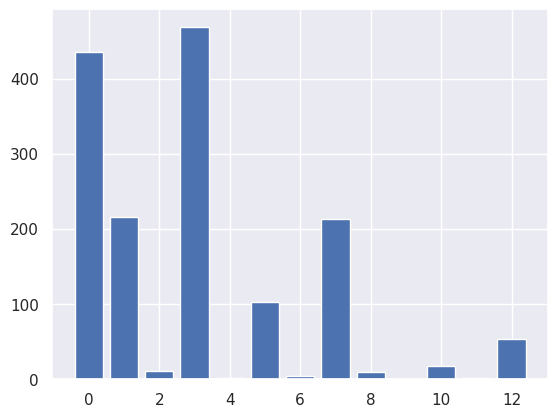

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.bar(*np.unique(test_preds.values.argmax(axis=-1), return_counts=True))

## Submission

In [165]:
submission = pd.read_csv(f"{data_dir}/SampleSubmission.csv")
display(submission.head())

,Field ID,Wheat,Mustard,Lentil,No Crop,Green pea,Sugarcane,Garlic,Maize,Gram,Coriander,Potato,Bersem,Rice
0,11,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
submission["Wheat"] = test_preds[0].values
submission["Mustard"] = test_preds[1].values
submission["Lentil"] = test_preds[2].values
submission["No Crop"] = test_preds[3].values
submission["Green pea"] = test_preds[4].values
submission["Sugarcane"] = test_preds[5].values
submission["Garlic"] = test_preds[6].values
submission["Gram"] = test_preds[7].values
submission["Maize"] = test_preds[8].values
submission["Coriander"] = test_preds[9].values
submission["Potato"] = test_preds[10].values
submission["Bersem"] = test_preds[11].values
submission["Rice"] = test_preds[12].values

display(submission.head())

,Field ID,Wheat,Mustard,Lentil,No Crop,Green pea,Sugarcane,Garlic,Maize,Gram,Coriander,Potato,Bersem,Rice
0,11,0.155815,0.255424,0.032462,0.075001,0.001089,0.478480,0.000227,0.000028,9.356356e-04,0.000020,0.000059,0.000008,0.000451
1,13,0.585929,0.163576,0.004953,0.234943,0.001669,0.005472,0.000462,0.000619,1.203717e-05,0.000085,0.000264,0.000483,0.001532
2,19,0.281418,0.267387,0.029384,0.074874,0.000573,0.345256,0.000074,0.000049,6.181439e-06,0.000881,0.000050,0.000039,0.000008
3,21,0.025661,0.212103,0.007055,0.585338,0.001547,0.153579,0.002127,0.000633,2.410234e-04,0.000035,0.006093,0.005408,0.000180
4,25,0.154236,0.016958,0.011254,0.814809,0.000068,0.002506,0.000024,0.000053,9.033334e-07,0.000024,0.000002,0.000060,0.000006


In [167]:
submission.to_csv(f"{data_dir}/submission.csv", index = False)

## References
- Papers
    - https://www.researchgate.net/publication/360681295_The_Evaluation_of_Spectral_Vegetation_Indexes_and_Redundancy_Reduction_on_the_Accuracy_of_Crop_Type_Detection
    - https://www.spiedigitallibrary.org/journals/journal-of-applied-remote-sensing/volume-12/issue-02/026019/Crop-classification-from-Sentinel-2-derived-vegetation-indices-using-ensemble/10.1117/1.JRS.12.026019.full
    - https://github.com/ArnolFokam/crop-type-detection-ICLR-2020/blob/master/solutions/youngtard/solution.ipynb

- Ideas & ressources
    - https://bigearth.net/#downloads
    - https://www.mdpi.com/2072-4292/13/23/4875
    - https://ai.facebook.com/blog/dino-paws-computer-vision-with-self-supervised-transformers-and-10x-more-efficient-training/